### Overview
In this tutorial, we will go through two of the very popular libraries - Bokeh, Matplotlib and Plotly to explore data. These are very popular libraries for visualising data in data science.

### Contents
1. What is Bokeh?
2. Using Bokeh to expore data
3. Plotly - a brief introduction
4. Good old Matplotlib

### Bokeh
If you are like me, wondering how to pronounce this word, Bokeh is pronounced as 'Bow' and 'Kah' as in Kettle. The term Bokeh is more popularly used in Photography, to dim the background and highlight the foreground. 

We have used Matplotlib to do the visualization assignment in the class. Most of the images rendered by MatPlotlib is static and there is no easy way to interact with the graph thus generated. Bokeh is useful mainly for interaction. The image of the plots that is rendered comes with an automatic set of tools, unless we specify 'tools==""' , we would still be able to interact with the image rendered. The Bokeh userguide claims that it is easy to visualize huge datasets, comprising of even big data and interact with them easily. 

Basic components of Bokeh
1. Plots: Placeholder for the image rendered. Unless you add things to plot, you will not get an output. We can add either glyphs, layouts, or tools to a plot object.
2. Glyphs : You can think of glyphs as shapes that represent a data point in an image.For example, in a 2D graph, a compination of x,y can be represented as a point or a circle or a diamond, and so on. So, these are visual markers in a plot.
    Some examples of glyphs are :
    asterisk()
    circle()
    circle_cross()
    circle_x()
    cross()
    square()
3. Layouts: Most popular layouts are rows and columns.
4. Widgets: Widgets are used in conjunction with CustomJS (Javascript to enable post-back when an event occurs) to link two plots or provide a highler level of interaction with the customer.
5. Models: These are lowest-level building blocks that make up the Bokeh “scenegraphs”. These are incorporated in the bokeh.models interface. Everything from a plot, panning tools, slider  (widgets), glyph rendered are considered models. These are not explicitly used in this tutorial, but keen developers will find interacting with models very useful and flexible.
6. Bokeh Server: An optional application server can be launched if there is a need to publish plots and create dashboards especailly when using streaming data sets.


### Let us start with Bokeh!


In [ ]:
#Let us install bokeh. Uncomment the following line to install Bokeh.
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install bokeh

In [ ]:
!{sys.executable} -m pip install plotly

In [3]:
# Here we import the methods to use
from bokeh.plotting import figure, output_notebook, show

### Figure, plot, output and show
The most used methods are the above four and they are all available in the bokeh.plotting library
There are 2 ways to render your plots. 1 is the output_file method, which takes in a filename param and the other is output_notebook() method. In this tutorial, because we need data embedded, I am going to use output_notebook() method.
The steps to generate any plot are to declare a plot and use the figure method, define the image's width and height. We then plot a simple x and y set of points and call the show() method. 

In [4]:
#Simplest Bokeh commands
output_notebook()

#Comment above line and un-comment below line to check how a new file is auto-generated on calling show()
#from bokeh.plotting import output_file
#output_file("js_on_change.html")

#Declare a plot and use the figure method, define the image's width and height
p = figure(plot_width=400, plot_height=400)

#Add a line and call the show() method that we imported from the 
p.line(x=[1, 2, 3], y=[5,3,7])


Loading BokehJS ...

GlyphRenderer(id='222a0754-6196-4e43-892b-d4838709cdc6', ...)

In [5]:
show(p)

Since the bokeh plots are not getting rendered in a static environment here, I have attached the screenshots here
<img src="./Simple_Plot.png" alt="Simple Bokeh plot" title="A simple plot" height="500" width="500" align="left">

### Check out the tools!!
Observe the Pan, Zoom , save, reset and help tools which are super handy!

In [20]:
#Plotting vertical bars
from bokeh.plotting import figure

#Here we call the figure function, add a 'vbar' glyph with x values only and other aesthetics such as color, width, etc..
plot2 = figure(plot_width=700, plot_height=400)
plot2.vbar(x=[1, 3, 5], width=0.25, bottom=0,
       top=[1.2, 2.5, 3.7], color="cyan")

show(plot2)

<img src="./vbar.png" alt="Simple Bokeh plot" title="Vertical Bars with colors and a different glyph" height="500" width="500" align="left">

### Widgets
These are imported from the from bokeh.models.widgets class.

In [7]:
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Slider

output_notebook()

slider = Slider(start=-1, end=20, value=1, step=.1, title="slider's current value")


Loading BokehJS ...

In [8]:
show(widgetbox(slider))

### A screenshot of  how this slider gets rendered and how you can interact with it
<img src="./slider_v2.gif" alt="Simple slider" height="500" width="500" align="left">

### The most popular Slider.
This is a Widget to check how a set of data varies over different values. Here, we are going to values of 0 to 100 change wrt. different degree polynomial functions. By sliding over different values of the power using the slider, we can see how the graph of x over x, x^2, x^3,x^4 changes.

In [26]:
from bokeh.layouts import column

#TO embed raw javascript code, we use CustomJS
from bokeh.models import CustomJS, ColumnDataSource, Slider

x = [x for x in range(0, 200)]
y = [x**3 for x in range(0,200)]

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var selected = cb_obj.value;
    x = data['x']
    y = data['y']
    for (i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], selected)
    }
    source.change.emit();
""")

slider = Slider(start=1, end=4, value=4, step=.1, title="power")
slider.js_on_change('value', callback)
layout = column(slider, plot)
show(layout)

### A screenshot of  how this slider interacts with the plot to plot x,x-square,x-cube functions in the y axis
<img src="./slider_power.gif" alt="Slider and polynomial plots" height="500" width="500" align="left">

### Custom data frame
Here, we create a new data frame which has three columns and 200 records, to understand how slider works in conjunction with customeJS.

In [29]:
time = ['1900']*100
time_part2 = ['2000']*100
time.extend(time_part2)
#print(time)
age=[20]*20
age_part2=[30]*20
age.extend(age_part2)
age_part3=[40]*30
age.extend(age_part3)
age_part4=[50]*40
age.extend(age_part4)
age_part5=[60]*90
age.extend(age_part5)
#print(len(age))
salary=[500]*20
salary_part2=[1000]*180
salary.extend(salary_part2)
#salary.extend(salary_part3)
#salary.extend(salary_part4)
#print(len(salary))

import pandas as pd
import numpy as np
demog_df = pd.DataFrame(np.column_stack([time, age, salary]), 
                               columns=['year', 'age', 'sal'])

#type(demog_df.year)
#print([demog_df.loc[demog_df.year=='1900'].age])

In [33]:
#Now lets plot how age and salary vary over time frames
x = [x for x in range(10, 110)]

source = ColumnDataSource(data=dict(x=x, y=demog_df.loc[demog_df.year=='1900'].sal))
source2=ColumnDataSource(data=dict(x=x, y=demog_df.loc[demog_df.year=='2000'].sal))

newplot = figure(plot_width=400, plot_height=400)
newplot.circle('x', 'y', source=source)

slider = Slider(start=1900, end=2000, value=1900, step=100, title="year")
slider.callback = CustomJS(args=dict(source=source,source2=source2), code="""

        var selected_function = cb_obj.value;
        
        var data_visible = source.value;
        var data_available = source2.value;
        
        data_visible.y = data_available.loc[data_available.year==selected_function].sal;
        
        source.change.emit();
""")

#slider.js_on_change('value', callback)

layout = column(slider, newplot)

show(layout)

<tr>
<td>
<img src="./custom_dataframe.png" alt="Slider and Demography" height="600" width="600" align="left" >
</td>
<td>
<img src="./custom_dataframe2.png" alt="Slider and Demography" height="500" width="500" align="left" >
</td>
</tr>

## MatPlotLib
I will now make use of a code that I scraped from glassdoor and indeed job portals to read the data frame using csvs. Here, I will make use of Pandas along with Numpy to use stacked histograms. I have collected data for 'data engineer' and data scientist. Now, lets explore how many companies as of 30.March.2018 have vacancies and how many job positions are available. 

In [12]:
file_name = 'scraped_data.csv'
dfJobSearch = pd.read_csv(file_name,encoding='cp1252')
dfJobSearch.head()

,Source,Search Term,Job Title,Company Name,Location,Salary,Page
0,Indeed,data scientist,Statistician-Data Analyst I - Govt EBT,FIS,"Saint Petersburg, FL",NaN,290
1,Indeed,data scientist,Market Research Analyst,Auto Club of Southern California,"Costa Mesa, CA 92626",NaN,290
2,Indeed,data scientist,Data Scientist,RJT Compuquest,"Chicago, IL",NaN,290
3,Indeed,data scientist,Entry Level - Statistician /Data Analyst,FIS,"Atlanta, GA",NaN,290
4,Indeed,data scientist,Junior Data Scientist,"Science System and Applications, Inc.","Hampton, VA",NaN,290


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from pandas.tools.plotting import table

#Grouping by company
dframe = dfJobSearch.groupby(['Company Name', 'Search Term'])['Search Term'].count().unstack('Search Term').fillna(0)

#sum each company and find the top 10 comoanies
dframe['Sum']=(dframe.sum(axis=1))
dframe = dframe.sort_values('Sum',ascending=False)[:10]

# Last column is no longer required, lets delete it
dframe= dframe.iloc[:, :-1]

#Lets see the structure of the dataframe now
dframe.head()

Search Term,data engineer,data scientist
Company Name,,
BOEING,22.0,76.0
Amazon.com,14.0,36.0
Parsons,34.0,12.0
ManTech,44.0,0.0
CPS,0.0,30.0


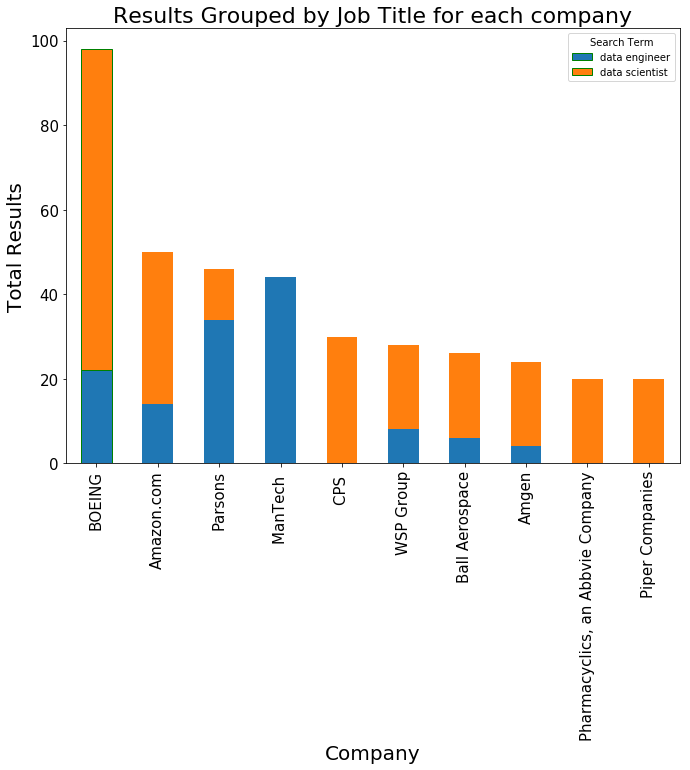

In [14]:
#Plotting the graph
graph = dframe.loc[:,dframe.columns].plot.bar(stacked=True, figsize=(11,8), edgecolor="green" ,
                                                   fontsize = 15);
graph.set_xlabel('Company', fontsize = 20);
graph.set_ylabel('Total Results', fontsize = 20);
graph.set_title('Results Grouped by Job Title for each company', fontsize = 22);

### Plotly
Another popular library especially known for its animation and interaction capabilities is Plotly. We will cover very basics here.

In [ ]:
import plotly.plotly as py
from plotly.graph_objs import *

data = [Bar(x=dfJobSearch.Source,
            y=dfJobSearch.Page)]

py.iplot(data, filename='jupyter/basic_bar')

### Source:
Hope this basic introduction to Bokeh helped you understand the basic building blocks

    1. User guide of Bokeh http://bokeh.pydata.org/en/0.11.1/docs/user_guide.html
    2. Videos in youtube of Bokeh, especially Sarah Bird's.